In [1]:
import sys 
import os
sys.path.append(os.path.abspath(r'scrapers\\reddit_scraper\\'))
import reddit_scraper

In [2]:
import pandas as pd

conf_ds=reddit_scraper.df

In [3]:
conf_ds

,Title,Score,Number_Of_Comments,Publish_Date,Content
0,"Met on Tinder in January, now he’s taking this...",677,27,1.563387e+09,
1,Update post on the girl I matched with from my...,639,92,1.636610e+09,"I know everyone was itching for an update, I g..."
2,He blocked me,622,10,1.555438e+09,
3,Hit on a chef and he definitely won.,600,7,1.559133e+09,
4,Haha!!!,582,3,1.586194e+09,
...,...,...,...,...,...
994,Guy hit dog and didn’t stop,14,8,1.625599e+09,Tinder guy was driving fast and a dog ran out ...
995,Not sure what to put as the title,13,6,1.666227e+09,Downloaded tinder after me and my ex split up....
996,Uhhhhh…..ok?,14,7,1.666149e+09,
997,"When you think you’ve got a good one, think ag...",14,3,1.666141e+09,I (26F) met “W” (28M) on the lovely dumpster f...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nixma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

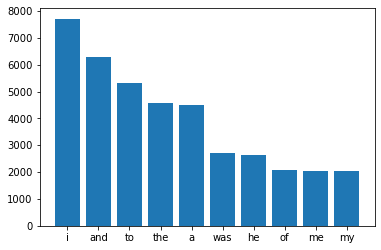

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re
import unicodedata
import string

nltk.download("stopwords")

stops = set(stopwords.words("english"))
#Building the corpus
corpus=[]
conf_ds['PreProcessedContent']=conf_ds['Content'].str.lower()
conf_ds['PreProcessedTitle']=conf_ds['Title'].str.lower()
content= conf_ds['PreProcessedContent'].str.split()
content=content.values.tolist()
corpus=[word for i in content for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stops:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [5]:
def change_epoch2date(date):
    return datetime.utcfromtimestamp(date).strftime('%d/%m/%Y')
conf_ds['Publish_Date']=conf_ds['Publish_Date'].apply(change_epoch2date)

def remove_whitespace(text):
    return  " ".join(text.split())
conf_ds['PreProcessedContent']=conf_ds['PreProcessedContent'].apply(remove_whitespace)
conf_ds['PreProcessedTitle']=conf_ds['PreProcessedTitle'].apply(remove_whitespace)

def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
conf_ds['PreProcessedContent']=conf_ds['PreProcessedContent'].apply(remove_accented_chars)
conf_ds['PreProcessedTitle']=conf_ds['PreProcessedTitle'].apply(remove_accented_chars)

def text_to_wordlist(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"U ", "you ", text)
    text = re.sub(r" u ", " you ", text)
    text = re.sub(r"ü ", "you ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"da ", " the ", text) 
    text = re.sub(r" b ", " be ", text)
    text = re.sub(r"'m", " am ", text)
    text = re.sub(r" IM ", " i am ", text)
    text = re.sub(r" im ", " i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r" wd ", " would ", text)
    text = re.sub(r" shd ", " should ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

conf_ds['PreProcessedContent']=conf_ds['PreProcessedContent'].apply(text_to_wordlist)
conf_ds['PreProcessedContent']=conf_ds['PreProcessedContent'].apply(remove_whitespace)
conf_ds['PreProcessedTitle']=conf_ds['PreProcessedTitle'].apply(text_to_wordlist)
conf_ds['PreProcessedTitle']=conf_ds['PreProcessedTitle'].apply(remove_whitespace)


conf_ds

,Title,Score,Number_Of_Comments,Publish_Date,Content,PreProcessedContent,PreProcessedTitle
0,"Met on Tinder in January, now he’s taking this...",677,27,17/07/2019,,,met tinder january hes taking ass around world
1,Update post on the girl I matched with from my...,639,92,11/11/2021,"I know everyone was itching for an update, I g...",know everyone itching update guess i will make...,update post girl matched stats midterm from r ...
2,He blocked me,622,10,16/04/2019,,,blocked
3,Hit on a chef and he definitely won.,600,7,29/05/2019,,,hit chef definitely won
4,Haha!!!,582,3,06/04/2020,,,haha ! ! !
...,...,...,...,...,...,...,...
994,Guy hit dog and didn’t stop,14,8,06/07/2021,Tinder guy was driving fast and a dog ran out ...,tinder guy driving fast dog ran man didnt even...,guy hit dog didnt stop
995,Not sure what to put as the title,13,6,20/10/2022,Downloaded tinder after me and my ex split up....,downloaded tinder split up first day matched c...,sure put title
996,Uhhhhh…..ok?,14,7,19/10/2022,,,uhhhhh ok
997,"When you think you’ve got a good one, think ag...",14,3,19/10/2022,I (26F) met “W” (28M) on the lovely dumpster f...,26f met 28m lovely dumpster fire app tinder ho...,think youve got good one think again


In [6]:
# Finding how many posts are empty

(conf_ds['PreProcessedContent']=='').sum()

507

In [7]:
#dropping empty posts

conf_ds=conf_ds.drop(conf_ds[conf_ds['PreProcessedContent']==''].index)
print(conf_ds.shape)
conf_ds

(492, 7)


,Title,Score,Number_Of_Comments,Publish_Date,Content,PreProcessedContent,PreProcessedTitle
1,Update post on the girl I matched with from my...,639,92,11/11/2021,"I know everyone was itching for an update, I g...",know everyone itching update guess i will make...,update post girl matched stats midterm from r ...
10,"My Match sent dick pics, only to realize he ha...",359,8,02/01/2019,As a woman I receive one thing without even as...,woman receive one thing without even asking fo...,match sent dick pics realize chlamydia
37,Don't use tinder in a small city,200,8,14/05/2019,"So I'm on tinder, match with this girl (we'll ...",i am tinder match girl we will call l kin the ...,use tinder small city
42,Real life tinder horror story,184,28,13/02/2021,My friend told me this horrific story yesterda...,friend told horrific story yesterday scariest ...,real life tinder horror story
45,Terrible Roommate,178,7,27/10/2019,I was back on my college campus for 10 days st...,back college campus days staying friends casua...,terrible roommate
...,...,...,...,...,...,...,...
991,Met my wife off Tinder Passport during the Cov...,14,6,12/05/2022,Anyone else have a Tinder Passport success sto...,anyone else tinder passport success story know...,met wife tinder passport covid lockdowns borde...
993,No to vitamin C,15,5,16/08/2021,"Last night i matched with a girl on tinder, he...",last night matched girl tinder name amanda tho...,vitamin
994,Guy hit dog and didn’t stop,14,8,06/07/2021,Tinder guy was driving fast and a dog ran out ...,tinder guy driving fast dog ran man didnt even...,guy hit dog didnt stop
995,Not sure what to put as the title,13,6,20/10/2022,Downloaded tinder after me and my ex split up....,downloaded tinder split up first day matched c...,sure put title


<BarContainer object of 10 artists>

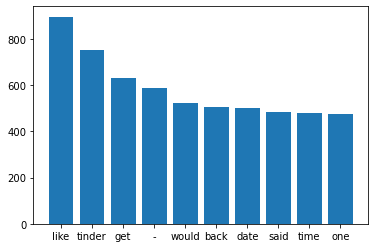

In [8]:
content= conf_ds['PreProcessedContent'].str.split()
content=content.values.tolist()
corpus=[word for i in content for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word not in stops:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

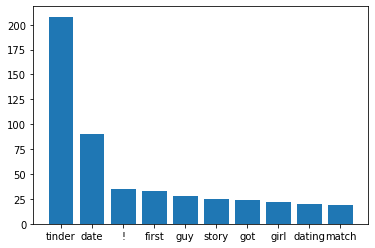

In [9]:
content= conf_ds['PreProcessedTitle'].str.split()
content=content.values.tolist()
corpus_title=[word for i in content for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus_title:
    if word not in stops:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [10]:
conf_ds.to_excel("Cleaned-TinderStories.xlsx")